In [1]:
# Common
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
# Radiomics package
import radiomics
from radiomics import featureextractor
import six, numpy as np


In [2]:
imageName, maskName = radiomics.getTestCase('brain1')
print(imageName, maskName)

C:\Users\charl\AppData\Local\Temp\pyradiomics\data\brain1_image.nrrd C:\Users\charl\AppData\Local\Temp\pyradiomics\data\brain1_label.nrrd


In [3]:
# Print the current working directory
print("Current working directory:", os.getcwd())
os.listdir(".\\Dataset_BUSI_with_GT\\benign") # List the files in a directory
benign_list = os.listdir(".\\Dataset_BUSI_with_GT\\benign") # save the list of files in a variable
print(benign_list[:5]) # print the first 5 elements of the list

Current working directory: d:\FHNW_Medical_Informatics\Python\Python_Learn\digital-biomarker-
['benign (127).nrrd', 'benign (127).png', 'benign (127)_mask.nrrd', 'benign (127)_mask.png', 'benign (128).nrrd']


In [4]:
indices = pd.read_csv(".\\Dataset_BUSI_with_GT\\Benign_malignant_indices.csv", header = 0, sep = ",") # read the csv file
print(indices.head(15)) # print the first 5 rows of the dataframe

    benign  malignant
0        1          1
1        3          4
2        7          5
3        8          6
4       10          7
5       12          8
6       15          9
7       16         11
8       17         16
9       18         17
10      19         18
11      20         19
12      21         20
13      23         21
14      24         22


In [5]:
len(benign_list) # print the length of the list

1656

In [6]:
malignant_list = os.listdir(".\\Dataset_BUSI_with_GT\\malignant") # List the files in a directory

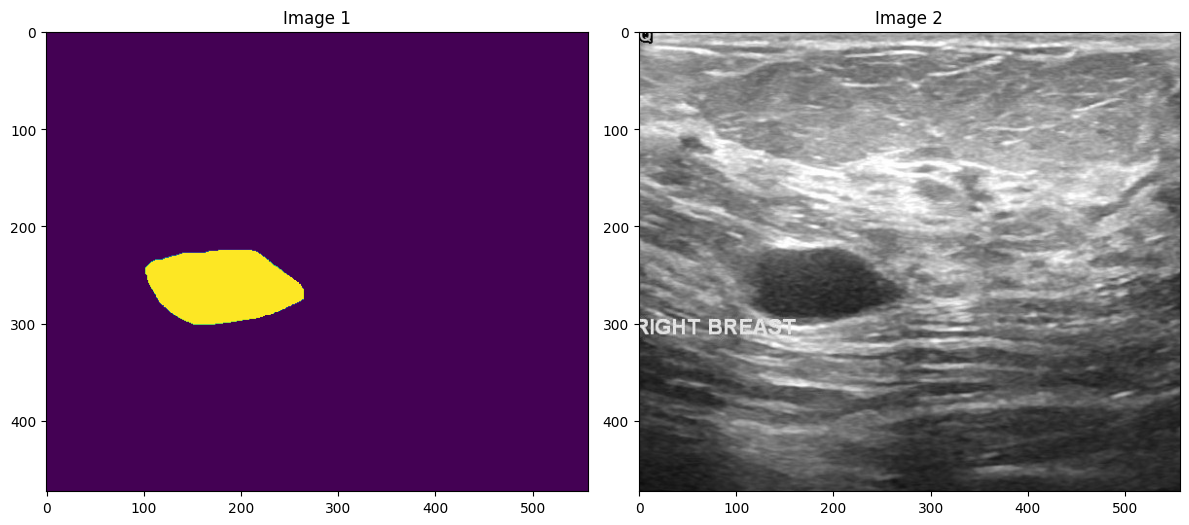

In [7]:
# benign data
file_path1 = 'Dataset_BUSI_with_GT\\benign\\benign (2)_mask.png' 
file_path2 = 'Dataset_BUSI_with_GT\\benign\\benign (2).png' 
image1 = plt.imread(file_path1)
image2 = plt.imread(file_path2)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) #1 row, 2 columns; figsize: width, height in inches

# Display the first image on the first subplot
ax1.imshow(image1)
ax1.set_title('Image 1')

# Display the second image on the second subplot
ax2.imshow(image2)
ax2.set_title('Image 2')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


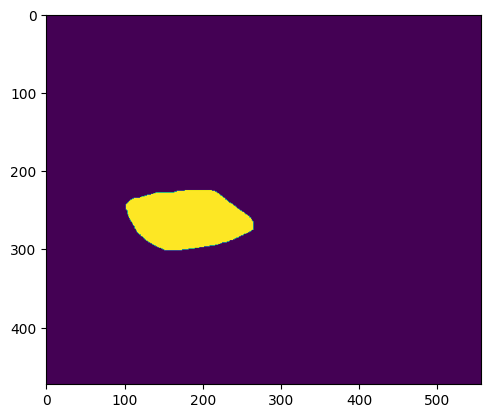

In [8]:
# Read the image using plt.imread
image = plt.imread(file_path1)

# Display the image
plt.imshow(image)
plt.show()

In [9]:
#generate .nrrd file within the same folder
import SimpleITK as sitk
img_path = "Dataset_BUSI_with_GT\\benign\\benign (2)_mask.png"
img = sitk.ReadImage(img_path)
sitk.WriteImage(img, img_path.split(".png")[0] + ".nrrd")

In [10]:
#iterate file within a folder
directory = os.fsencode("Dataset_BUSI_with_GT\\benign\\")
    
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".png") : 
        print(directory.decode(encoding="utf-8"), filename) #print the path and filename
        img_path = directory.decode(encoding="utf-8") + filename #concatenate path and filename
        img = sitk.ReadImage(img_path)
        sitk.WriteImage(img, img_path.split(".png")[0] + ".nrrd")

Dataset_BUSI_with_GT\benign\ benign (127).png
Dataset_BUSI_with_GT\benign\ benign (127)_mask.png
Dataset_BUSI_with_GT\benign\ benign (128).png
Dataset_BUSI_with_GT\benign\ benign (128)_mask.png
Dataset_BUSI_with_GT\benign\ benign (129).png
Dataset_BUSI_with_GT\benign\ benign (129)_mask.png
Dataset_BUSI_with_GT\benign\ benign (13).png
Dataset_BUSI_with_GT\benign\ benign (13)_mask.png
Dataset_BUSI_with_GT\benign\ benign (130).png
Dataset_BUSI_with_GT\benign\ benign (130)_mask.png
Dataset_BUSI_with_GT\benign\ benign (131).png
Dataset_BUSI_with_GT\benign\ benign (131)_mask.png
Dataset_BUSI_with_GT\benign\ benign (132).png
Dataset_BUSI_with_GT\benign\ benign (132)_mask.png
Dataset_BUSI_with_GT\benign\ benign (133).png
Dataset_BUSI_with_GT\benign\ benign (133)_mask.png
Dataset_BUSI_with_GT\benign\ benign (134).png
Dataset_BUSI_with_GT\benign\ benign (134)_mask.png
Dataset_BUSI_with_GT\benign\ benign (135).png
Dataset_BUSI_with_GT\benign\ benign (135)_mask.png
Dataset_BUSI_with_GT\benign\ ben

In [11]:
# #get testCase

# imagePath = ".\\Dataset_BUSI_with_GT\\benign\\benign (50).nrrd"
# maskPath = ".\\Dataset_BUSI_with_GT\\benign\\benign (50)_mask.nrrd"

# imagePath, maskPath = radiomics.getTestCase(".\\data\\benign50_mask.nrrd", ".\\data\\benign50.nrrd")

imagePath = ".\\Dataset_BUSI_with_GT\\example_data\\brain1_image.nrrd"
maskPath = ".\\Dataset_BUSI_with_GT\\example_data\\brain1_label.nrrd"

if imagePath is None or maskPath is None:  # Something went wrong, in this case PyRadiomics will also log an error
    raise Exception('Error getting testcase!')  # Raise exception to prevent cells below from running in case of "run all"

# Additonally, store the location of the example parameter file, stored in \pyradiomics\examples/exampleSettings
paramPath = os.path.join('..', 'examples', 'exampleSettings', 'Params.yaml')
print('Parameter file, absolute path:', os.path.abspath(paramPath))

Parameter file, absolute path: d:\FHNW_Medical_Informatics\Python\Python_Learn\examples\exampleSettings\Params.yaml


In [12]:
#instantiate the extractor
#method 1: use default setting
extractor = featureextractor.RadiomicsFeatureExtractor()

print('Extraction parameters:\n\t', extractor.settings)
print('Enabled filters:\n\t', extractor.enabledImagetypes)
print('Enabled features:\n\t', extractor.enabledFeatures)

Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
Enabled filters:
	 {'Original': {}}
Enabled features:
	 {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}


In [13]:
#method 2: use customized setting
# First define the settings
settings = {}
settings['binWidth'] = 20
settings['sigma'] = [1, 2, 3]

# Instantiate the extractor
extractor = featureextractor.RadiomicsFeatureExtractor(**settings)  # ** 'unpacks' the dictionary in the function call

print('Extraction parameters:\n\t', extractor.settings)
print('Enabled filters:\n\t', extractor.enabledImagetypes)  # Still the default parameters
print('Enabled features:\n\t', extractor.enabledFeatures)  # Still the default parameters

Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'binWidth': 20, 'sigma': [1, 2, 3]}
Enabled filters:
	 {'Original': {}}
Enabled features:
	 {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}


In [14]:
# This cell is equivalent to the previous cell
extractor = featureextractor.RadiomicsFeatureExtractor(binWidth=20, sigma=[1, 2, 3])  # Equivalent of code above

print('Extraction parameters:\n\t', extractor.settings)
print('Enabled filters:\n\t', extractor.enabledImagetypes)  # Still the default parameters
print('Enabled features:\n\t', extractor.enabledFeatures)  # Still the default parameters

Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'binWidth': 20, 'sigma': [1, 2, 3]}
Enabled filters:
	 {'Original': {}}
Enabled features:
	 {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}


In [15]:
# Enable a filter (in addition to the 'Original' filter already enabled)
extractor.enableImageTypeByName('LoG')
print('')
print('Enabled filters:\n\t', extractor.enabledImagetypes)

# Disable all feature classes, save firstorder
extractor.disableAllFeatures()
extractor.enableFeatureClassByName('firstorder')
print('')
print('Enabled features:\n\t', extractor.enabledFeatures)

# Specify some additional features in the GLCM feature class
extractor.enableFeaturesByName(glcm=['Autocorrelation', 'Homogeneity1', 'SumSquares'])
print('')
print('Enabled features:\n\t', extractor.enabledFeatures)


Enabled filters:
	 {'Original': {}, 'LoG': {}}

Enabled features:
	 {'firstorder': []}

Enabled features:
	 {'firstorder': [], 'glcm': ['Autocorrelation', 'Homogeneity1', 'SumSquares']}


In [16]:
#method 3: use a parameter file
# Instantiate the extractor
paramPath =".\\config\\params.yaml"
extractor = featureextractor.RadiomicsFeatureExtractor(paramPath)

print('Extraction parameters:\n\t', extractor.settings)
print('Enabled filters:\n\t', extractor.enabledImagetypes)
print('Enabled features:\n\t', extractor.enabledFeatures)

Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'binWidth': 25, 'weightingNorm': None}
Enabled filters:
	 {'Original': {}}
Enabled features:
	 {'shape': None, 'firstorder': [], 'glcm': ['Autocorrelation', 'JointAverage', 'ClusterProminence', 'ClusterShade', 'ClusterTendency', 'Contrast', 'Correlation', 'DifferenceAverage', 'DifferenceEntropy', 'DifferenceVariance', 'JointEnergy', 'JointEntropy', 'Imc1', 'Imc2', 'Idm', 'Idmn', 'Id', 'Idn', 'InverseVariance', 'MaximumProbability', 'SumEntropy', 'SumSquares'], 'glrlm': None, 'glszm': None, 'gldm': None}


In [17]:
 
#extract features 
result = extractor.execute(imagePath, maskPath) 

In [18]:
#marcus modified template
#create a function to read image and mask data based on indices from a CSV file
def get_benign_data(file_path, data_folder):
    benign_images = [] #empty list used to store images and masks
    benign_masks = []
    
    # Read indices from the CSV file
    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)

        benign_indices = [row[0] for row in csv_reader] #iterates through each row in the CSV file and extracts the value from the first column at index [0]. 

    for index in benign_indices[1:]: #skip the first row bcoz first row is the header
        try:
            image_path = os.path.join(data_folder, f'benign ({index}).png')
            mask_path = os.path.join(data_folder, f'benign ({index})_mask.png')

            # Load and process images
            image = plt.imread(image_path)[:, :, 0]  # Convert to grayscale
            mask = plt.imread(mask_path)  # Masks only have one channel by default

            benign_images.append(image)
            benign_masks.append(mask)
        except:
            print(f'benign ({index}).png do not exist')

    return benign_images, benign_masks

In [19]:
array_benign = get_benign_data('.\\Dataset_BUSI_with_GT\\Benign_malignant_indices.csv', '.\\Dataset_BUSI_with_GT\\benign')

benign (1).png do not exist
benign (10).png do not exist
benign (12).png do not exist
benign (101).png do not exist
benign (102).png do not exist
benign (103).png do not exist
benign (104).png do not exist
benign (105).png do not exist
benign (106).png do not exist
benign (107).png do not exist
benign (108).png do not exist
benign (109).png do not exist
benign (110).png do not exist
benign (111).png do not exist
benign (113).png do not exist
benign (114).png do not exist
benign (116).png do not exist
benign (117).png do not exist
benign (118).png do not exist
benign (119).png do not exist
benign (120).png do not exist
benign (121).png do not exist
benign (122).png do not exist
benign (124).png do not exist
benign (125).png do not exist
benign (126).png do not exist


In [20]:
#0 is black, 1 is white, rest is grey 
array_benign 

([array([[0.7764706 , 0.7921569 , 0.77254903, ..., 0.70980394, 0.68235296,
          0.6745098 ],
         [0.81960785, 0.58431375, 0.07843138, ..., 0.70980394, 0.6862745 ,
          0.6666667 ],
         [0.6392157 , 0.01568628, 0.        , ..., 0.7254902 , 0.7176471 ,
          0.7176471 ],
         ...,
         [0.07843138, 0.08235294, 0.08235294, ..., 0.13725491, 0.1254902 ,
          0.12156863],
         [0.09411765, 0.09803922, 0.09411765, ..., 0.15686275, 0.14901961,
          0.14117648],
         [0.10980392, 0.11764706, 0.11764706, ..., 0.10980392, 0.10196079,
          0.10196079]], dtype=float32),
  array([[0.80784315, 0.2509804 , 0.01568628, ..., 0.        , 0.02352941,
          0.00392157],
         [0.76862746, 0.2901961 , 0.00784314, ..., 0.        , 0.03529412,
          0.        ],
         [0.8235294 , 0.36078432, 0.        , ..., 0.8       , 0.        ,
          0.02352941],
         ...,
         [0.11372549, 0.11764706, 0.12156863, ..., 0.09803922, 0.10196079

In [22]:
#prepare features and classification lists
areas = []
perimeters = []
tumor_classifications = []

In [23]:
for index in range(len(masks)):
areas.append(get_area(…))
perimeters.append(get_perimeter(…))
tumor_classification.append(0)

SyntaxError: invalid character '…' (U+2026) (3950896895.py, line 2)